In [76]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [77]:
# database connection
database = 'database.sqlite'

conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
print("Connection Successful",conn)

Connection Successful <sqlite3.Connection object at 0x7fe51831f110>


In [78]:
# load and read data in pd dataframe
df = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [79]:
df.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [80]:
print(df.columns)

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [81]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## Data Cleaning

In [82]:
# if any of the 183978 rows have null value in one of the 42 columns
df.isnull().any().any(), df.shape

(True, (183978, 42))

In [83]:
# find how many data points in each column are null
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [84]:
# drop the null values by going through each row
rows = df.shape[0]
df=df.dropna()
print(rows)
df.isnull().any().any(), df.shape

183978


(False, (180354, 42))

In [85]:
delRowNum = rows - df.shape[0]
print('lines deleted are:'+ str(delRowNum))

lines deleted are:3624


## K-means Clustering

In [86]:
selectfivefeatures = ['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']
selectfivefeatures

['gk_kicking', 'potential', 'marking', 'interceptions', 'standing_tackle']

In [87]:
df_select = df[selectfivefeatures].copy(deep=True)
df_select.head()

,gk_kicking,potential,marking,interceptions,standing_tackle
0,10.0,71.0,65.0,70.0,69.0
1,10.0,71.0,65.0,70.0,69.0
2,10.0,66.0,65.0,41.0,66.0
3,9.0,65.0,62.0,40.0,63.0
4,9.0,65.0,62.0,40.0,63.0


In [88]:
# Perform scaling on the dataframe containing the features

data = scale(df_select)

# Define number of clusters
noOfClusters = 4

# Train a model
model = KMeans(init='k-means++', n_clusters=noOfClusters, n_init=20).fit(data)

In [90]:
print(90*'*')
print("\nCount of players in each cluster")
print(90*'*')

pd.value_counts(model.labels_, sort=False)

******************************************************************************************

Count of players in each cluster
******************************************************************************************


0    55903
1    50202
2    23777
3    50472
dtype: int64

In [101]:
def pd_centers(featuresUsed, centers):
    from itertools import cycle, islice
    from pandas.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    from itertools import cycle, islice
    from pandas.plotting import parallel_coordinates
    import matplotlib.pyplot as plt
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [102]:
Pan = pd_centers(featuresUsed=selectfivefeatures, centers=model.cluster_centers_)
Pan

,gk_kicking,potential,marking,interceptions,standing_tackle,prediction
0,-0.477098,0.105698,-0.947597,-0.975163,-0.914172,0
1,-0.337554,-0.843380,0.548389,0.407506,0.550946,1
2,1.920631,0.037763,-1.111727,-0.653150,-1.200879,2
3,-0.040342,0.704518,1.027874,0.982576,1.030300,3


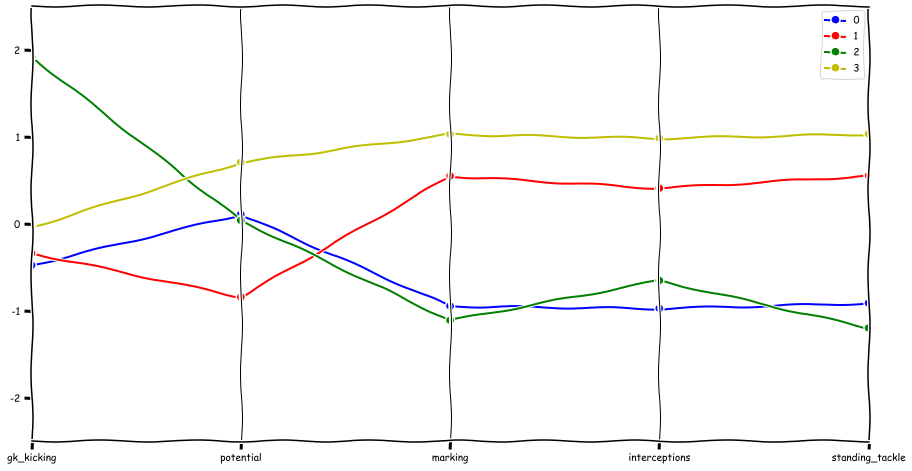

In [103]:
%matplotlib inline 
parallel_plot(Pan)
plt.xkcd()

In [104]:
type(model)

sklearn.cluster.k_means_.KMeans